In [1]:
from keras import Model, Input
from keras.layers import Dense
import matplotlib.pyplot as plt

input_dim = 28*28
latent_vec_dim = 16

input_layer = Input(shape=(input_dim,))

2026-02-10 21:21:13.740501: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-10 21:21:13.791419: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-10 21:21:15.166192: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


# Encoder

In [2]:
# Define the autoencoder architecture
# First build the encoder
enc_layer_1 = Dense(500, activation='sigmoid')(input_layer)
enc_layer_2 = Dense(300, activation='sigmoid')(enc_layer_1)
enc_layer_3 = Dense(100, activation='sigmoid')(enc_layer_2)
enc_layer_4 = Dense(latent_vec_dim, activation='tanh')(enc_layer_3)
encoder = enc_layer_4

2026-02-10 21:21:17.378739: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


# Decoder

In [3]:
# Then build the decoder
dec_layer_1 = Dense(100, activation='sigmoid')(encoder)
dec_layer_2 = Dense(300, activation='sigmoid')(dec_layer_1)
dec_layer_3 = Dense(500, activation='sigmoid')(dec_layer_2)
dec_layer_4 = Dense(input_dim, activation='sigmoid')(dec_layer_3)
decoder = dec_layer_4

# Autoencoder

In [4]:
# Connect both encoder and decoder
autoencoder = Model(input_layer, decoder, name="DeepAE")

# Latent representation (Optional)
latent_model = Model(input_layer, encoder)

# Get summary
autoencoder.summary()

Model: "DeepAE"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │       150,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │         1,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 300)            │        30,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 500)            │       150,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │       392,784 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,149,800 (4.39 MB)

 Trainable params: 1,149,800 (4.39 MB)

 Non-trainable params: 0 (0.00 B)

# MNIST

In [5]:
# Acquire MNIST data
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape data for an MLP input
import numpy as np

train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))

# Normalize data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [6]:
# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Train the autoencoder with MNIST data
history = autoencoder.fit(train_images, train_images, epochs=5, batch_size=128,
                          shuffle=True, validation_data=(test_images, test_images))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.2673 - val_loss: 0.2451
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.2346 - val_loss: 0.2261
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.2210 - val_loss: 0.2149
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.2136 - val_loss: 0.2099
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.2091 - val_loss: 0.2068


# Plot training and validation loss scores


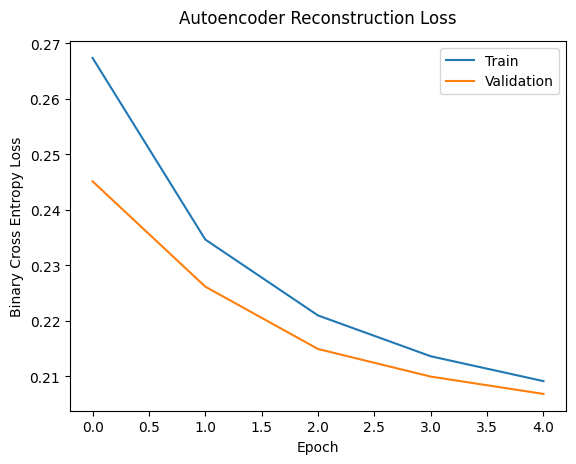

In [7]:
# against the number of epochs.
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')